In [6]:
import os
import requests

# Clone the repository
os.system("git clone https://github.com/IDEA-Research/GroundingDINO.git")

fatal: destination path 'GroundingDINO' already exists and is not an empty directory.


32768

In [7]:
# Change directory to the cloned repository
os.chdir(os.path.join("GroundingDINO"))

# Install the package in editable mode
os.system("pip install -q -e .")

# Install the supervision package
os.system("pip install supervision")


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


0

: 

In [ ]:
import os
project_dir = os.path.expanduser("/Users/pattphurtivilai/Desktop/GroundingDino")

In [ ]:
# Create a directory for weights
weights_dir = os.path.join(project_dir,"weights")
os.makedirs(weights_dir, exist_ok=True)

# Change directory to the weights directory
os.chdir(weights_dir)

# Download the weight file
weight_url = "https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth"
weight_filename = os.path.basename(weight_url)
weight_filepath = os.path.join(weights_dir, weight_filename)

response = requests.get(weight_url)
if response.status_code == 200:
    with open(weight_filepath, 'wb') as f:
        f.write(response.content)
    print("Weight file downloaded successfully.")
else:
    print(f"Failed to download weight file. Status code: {response.status_code}")

In [ ]:
# Create a directory for data
data_dir = os.path.join(project_dir,"data")
os.makedirs(data_dir, exist_ok=True)

# Change directory to the data directory
os.chdir(data_dir)

# URLs of the images to download
image_urls = {
    "compass.jpg": "https://unsplash.com/photos/xu2WYJek5AI/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8MTV8fGNvbXBhc3N8ZW58MHx8fHwxNjg5MTc2NzMyfDA&force=true&w=960",
    "air.jpg": "https://unsplash.com/photos/AlA8S9tALAs/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8MTR8fHBhcmFjaHV0ZXxlbnwwfHx8fDE2ODkwOTU1MTJ8MA&force=true&w=960",
    "ocean.jpg": "https://unsplash.com/photos/1PWhYZ_erME/download?ixid=M3wxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjg5MDA2MTk5fA&force=true&w=960",
    "snow.jpg": "https://unsplash.com/photos/MB1FuEh0AzU/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8NHx8c25vd2JvYXJkZXJzfGVufDB8MHx8fDE2ODkwMTk0NTB8MA&force=true&w=960",
    "hardware.jpg": "https://unsplash.com/photos/lllK4-63KTw/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8Mnx8Ym9sdCUyMGFuZCUyMHdhc2hlcnxlbnwwfHx8fDE2ODkxNzg1NTN8MA&force=true&w=960"
}

# Download each image
for filename, url in image_urls.items():
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(data_dir, filename), 'wb') as f:
            f.write(response.content)
        print(f"{filename} downloaded successfully.")
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")

In [ ]:
import os
from groundingdino.util.inference import load_model

# Define paths
groundingdino_dir = os.path.join(project_dir, "GroundingDINO")
model_config_path = os.path.join(groundingdino_dir, "groundingdino/config/GroundingDINO_SwinT_OGC.py")
weights_path = os.path.join(project_dir, "weights/groundingdino_swint_ogc.pth")

# Load model
model = load_model(model_config_path, weights_path)



/Users/pattphurtivilai/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/pattphurtivilai/Desktop/GroundingDino/GroundingDINO/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")
/Users/pattphurtivilai/anaconda3/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [ ]:
import os
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Define constants and paths
IMAGE_NAME = "compass.jpg"
IMAGE_PATH = os.path.join(project_dir, "data", IMAGE_NAME)
TEXT_PROMPT = "compass"
BOX_THRESHOLD = 0.70
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device

# Load image
image_source, image = load_image(IMAGE_PATH)
print(image.shape)

# Perform object detection
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    device=DEVICE  # Pass "cpu" as the device
)

# Annotate the image
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display the annotated image
sv.plot_image(annotated_frame, (16, 16))


In [ ]:
import os
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Define constants and paths
IMAGE_NAME = "hardware.jpg"
IMAGE_PATH = os.path.join(project_dir, "data", IMAGE_NAME)
TEXT_PROMPT = "spanner"
BOX_THRESHOLD = 0.70
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device

# Load image
image_source, image = load_image(IMAGE_PATH)

# Perform object detection
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    device=DEVICE  # Pass "cpu" as the device
)

# Annotate the image
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display the annotated image
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import os
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Define constants and paths
IMAGE_NAME = "gene.jpg"
IMAGE_PATH = os.path.join(project_dir, "data", IMAGE_NAME)
TEXT_PROMPT = "doll"
BOX_THRESHOLD = 0.70
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device

# Load image
image_source, image = load_image(IMAGE_PATH)

# Perform object detection
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD,
    device=DEVICE  # Pass "cpu" as the device
)

# Annotate the image
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Display the annotated image
sv.plot_image(annotated_frame, (16, 16))

Open Webcam Snap

torch.Size([3, 750, 1333])
torch.Size([3, 750, 1333])
torch.Size([3, 750, 1333])
torch.Size([3, 750, 1333])
torch.Size([3, 750, 1333])


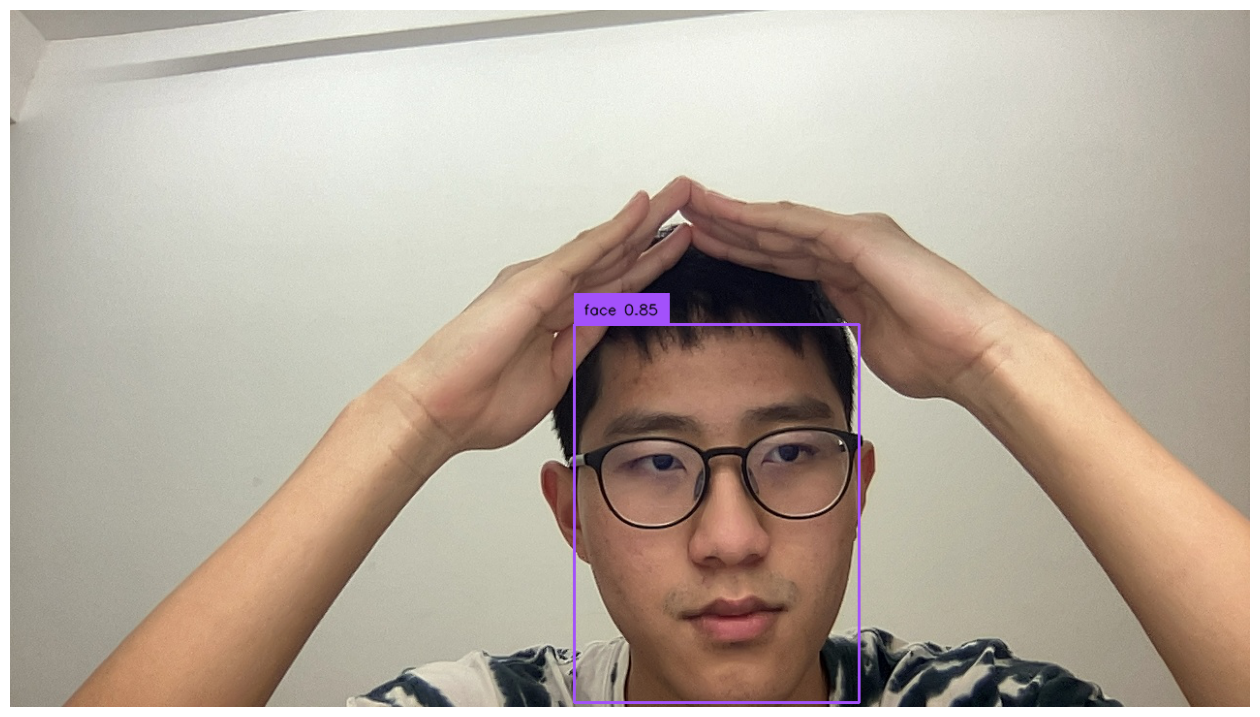

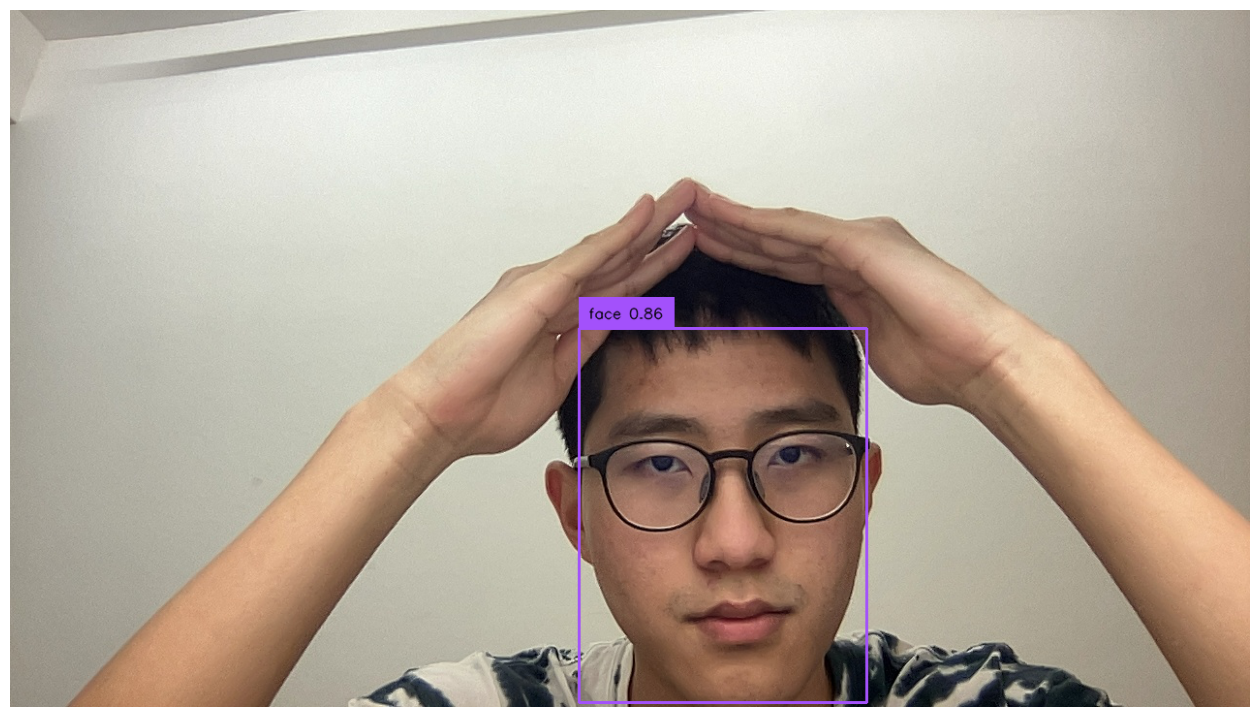

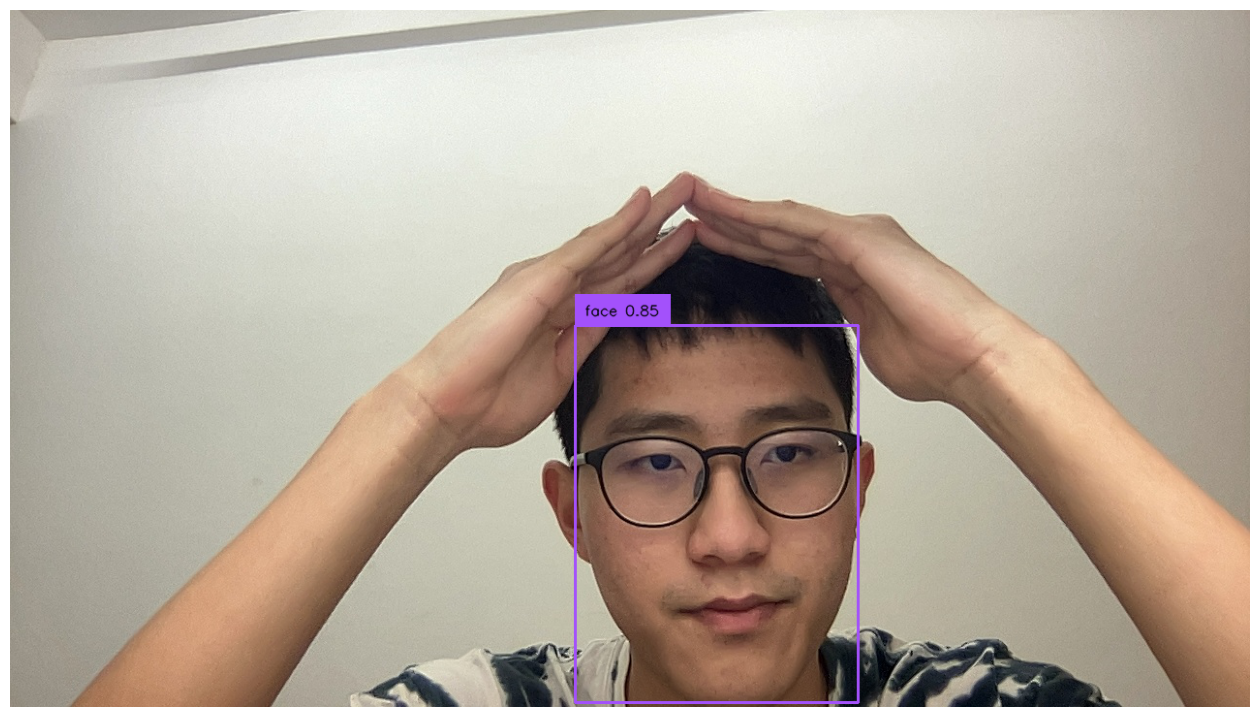

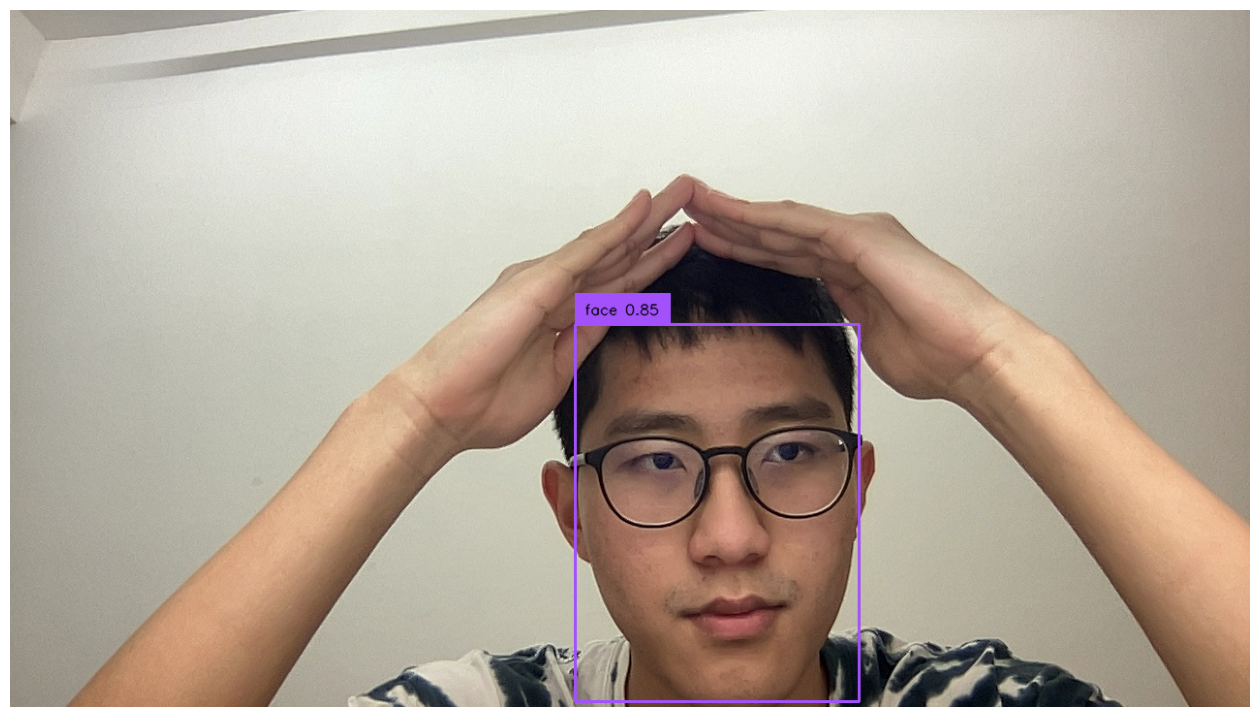

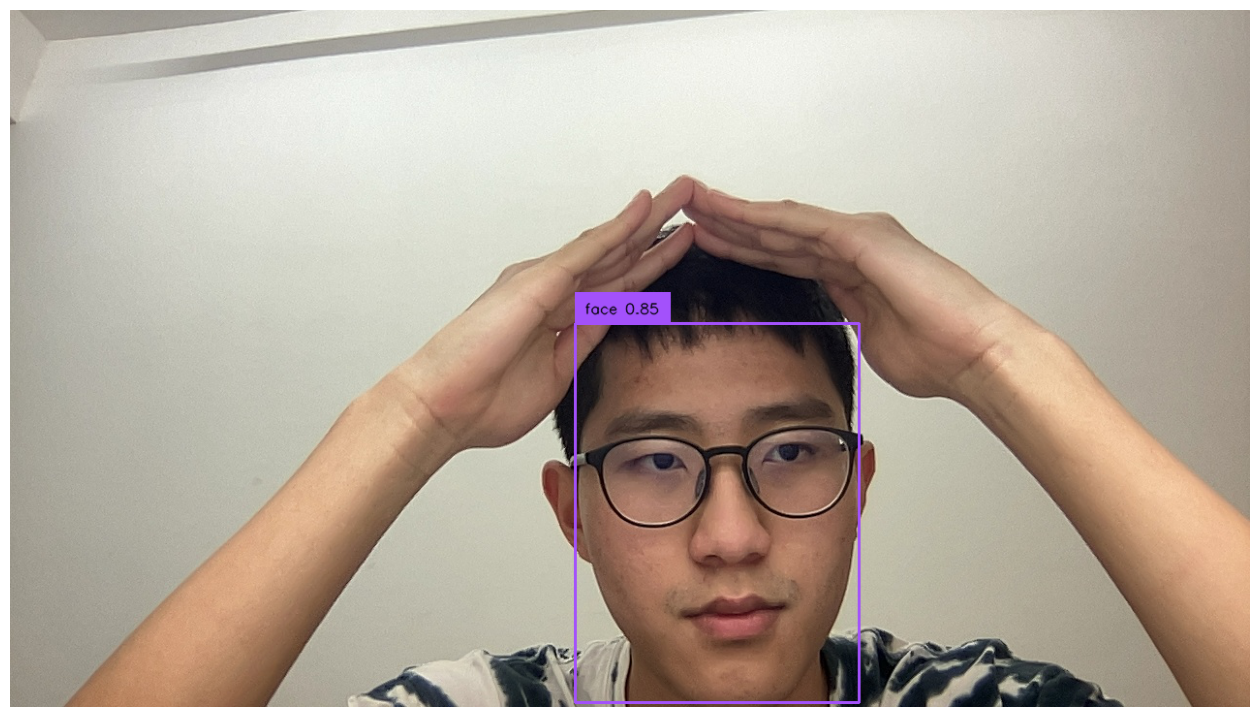

In [ ]:
import os
import cv2
import time
import supervision as sv
from groundingdino.util.inference import load_image, predict, annotate

# Constants and paths
IMAGE_FOLDER = "snap"
TEXT_PROMPT = "face"
BOX_THRESHOLD = 0.50
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device
SNAP_INTERVAL = 2   # Interval to capture frames (in seconds)
NUM_SNAPS = 5     # Total number of frames to capture

# Change directory to the data directory
os.chdir(project_dir)

# Check if the image folder exists and delete its contents if it does
if os.path.exists(IMAGE_FOLDER):
    for filename in os.listdir(IMAGE_FOLDER):
        file_path = os.path.join(IMAGE_FOLDER, filename)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)

# Create folder if it doesn't exist
else:
    os.makedirs(IMAGE_FOLDER)

# Function to capture frames from webcam and save them to the folder
def capture_frames(folder, interval, num_snaps):
    cap = cv2.VideoCapture(0)  # 0 for default webcam
    
    time.sleep(2)  # Delay start by 2 seconds
    
    frame_count = 0
    while frame_count < num_snaps:
        ret, frame = cap.read()
        if not ret:
            break

        cv2.imshow('snap', frame)
        frame_count += 1

        # Save frame every interval seconds
        image_name = f"snap_{frame_count}.jpg"
        cv2.imwrite(os.path.join(folder, image_name), frame)

        time.sleep(interval)
    cap.release()
    cv2.destroyAllWindows()

# Function to annotate images in the folder
def annotate_images(folder):
    annotated_images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image_source, image = load_image(image_path)

            # Perform object detection
            boxes, logits, phrases = predict(
                model=model,
                image=image,
                caption=TEXT_PROMPT,
                box_threshold=BOX_THRESHOLD,
                text_threshold=TEXT_THRESHOLD,
                device=DEVICE
            )

            # Annotate the image
            annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
            annotated_images.append((image_path, annotated_frame))

    return annotated_images

# Capture frames from webcam and save them
capture_frames(IMAGE_FOLDER,SNAP_INTERVAL, NUM_SNAPS)

# Annotate images in the folder and replace them
annotated_images = annotate_images(IMAGE_FOLDER)
for image_path, annotated_frame in annotated_images:
    cv2.imwrite(image_path, annotated_frame)

# Display annotated images (optional)
for image_path, annotated_frame in annotated_images:
    sv.plot_image(annotated_frame, (16, 16), f"Annotated Image: {image_path}")


OpenWebcam RealTime

In [ ]:
import cv2
import torch
import numpy as np
from groundingdino.util.inference import predict, annotate
from copy import deepcopy

# Define constants and paths
TEXT_PROMPT = "cap"
BOX_THRESHOLD = 0.70
TEXT_THRESHOLD = 0.25
DEVICE = "cpu"  # Specify "cpu" as the device


# Initialize webcam capture
cap = cv2.VideoCapture(0)

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        print("Error: Failed to capture image from webcam")
        break

    # Preprocess the frame
    #image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (800, 800))  # Resize to match model input size
    image = image.astype(np.float32) / 255.0  # Normalize pixel values
    
    #print(image.shape)
    image2 = deepcopy(image)
    image2 = np.swapaxes(image2, 2, 0)

    # Convert numpy array to PyTorch tensor
    image_tensor = torch.from_numpy(image2)
    #print(image_tensor.shape)

    # Perform object detection
    with torch.no_grad():
        # Perform object detection using Grounding Dino
        boxes, logits, phrases = predict(
            model=model,
            image=image_tensor,
            caption=TEXT_PROMPT,
            box_threshold=BOX_THRESHOLD,
            text_threshold=TEXT_THRESHOLD,
            device=DEVICE
        )

    # Annotate the image
    annotated_frame = annotate(image_source=frame, boxes=boxes, logits=logits, phrases=phrases)

    # Display the annotated image
    cv2.imshow("Result", annotated_frame)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()




torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])
torch.Size([3, 800, 800])


KeyboardInterrupt: 

In [ ]:
cv2.destroyAllWindows()